In [1]:
%%html
<style type='text/css'>
.CodeMirror{
font-size: 14px;
font-family: consolas;
</style>

# (1) Discover and visualise the data

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd

# Train Dataset
train_data = pd.read_csv('UNSW_NB15_training-set.csv')
train_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [3]:
# Test Dataset
test_data = pd.read_csv('UNSW_NB15_testing-set.csv')
test_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
train_data.shape

(82332, 45)

In [5]:
test_data.shape

(175341, 45)

### (1-1) Check whether dataset has null values

In [6]:
train_data.info()
# all features are non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [7]:
test_data.info()
# all features are non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

### (1-2) Check whether dataset has duplicates or null values

In [8]:
train_data.duplicated().sum()
# no duplicated values

0

In [9]:
test_data.duplicated().sum()
# no duplicated values

0

In [10]:
train_data.isnull().sum()
# no null values found

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [11]:
test_data.isnull().sum()
# no null values found

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

# Target 1 : Label  

### (1-3) Handle categorical variables (Target 1 : Label)

In [12]:
from sklearn import preprocessing

train_d = pd.get_dummies(train_data, columns=['proto', 'service', 'state', 'attack_cat'])
test_d = pd.get_dummies(test_data, columns=['proto', 'service', 'state', 'attack_cat'])

### (1-4) Check correlation and rank in descending order

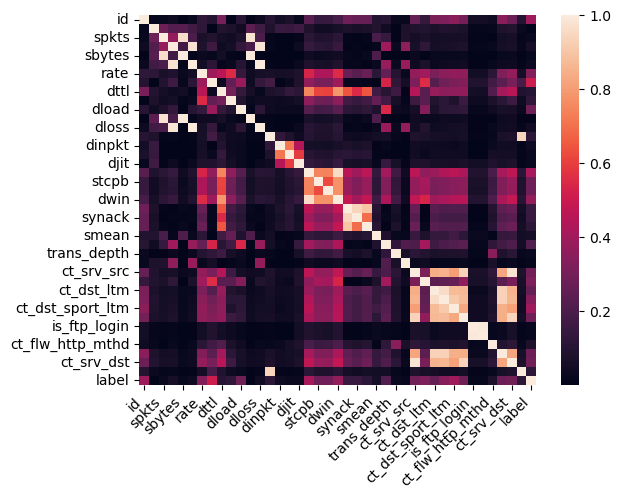

In [13]:
corr_matrix = train_data.corr(method='pearson').abs()

import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corr_matrix)
plt.xticks(rotation=45, ha='right')
plt.show()

### (1-5) Keep 10 features with high correlation

In [14]:
# Create a list of the top 10 correlated columns
top_10_cols = corr_matrix.sort_values(by='label', ascending=False).index[:11].tolist()

# Drop all columns except for the top 10
train_data_copy = train_data
train_data_copy = train_data_copy.drop(columns=[col for col in train_data.columns if col not in top_10_cols])
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                82332 non-null  int64  
 1   rate              82332 non-null  float64
 2   sttl              82332 non-null  int64  
 3   swin              82332 non-null  int64  
 4   dwin              82332 non-null  int64  
 5   ct_srv_src        82332 non-null  int64  
 6   ct_state_ttl      82332 non-null  int64  
 7   ct_src_dport_ltm  82332 non-null  int64  
 8   ct_dst_sport_ltm  82332 non-null  int64  
 9   ct_srv_dst        82332 non-null  int64  
 10  label             82332 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 6.9 MB


In [15]:
# Drop all columns except for the top 10
test_data_copy = test_data
test_data_copy = test_data.drop(columns=[col for col in train_data.columns if col not in top_10_cols])
test_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                175341 non-null  int64  
 1   rate              175341 non-null  float64
 2   sttl              175341 non-null  int64  
 3   swin              175341 non-null  int64  
 4   dwin              175341 non-null  int64  
 5   ct_srv_src        175341 non-null  int64  
 6   ct_state_ttl      175341 non-null  int64  
 7   ct_src_dport_ltm  175341 non-null  int64  
 8   ct_dst_sport_ltm  175341 non-null  int64  
 9   ct_srv_dst        175341 non-null  int64  
 10  label             175341 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 14.7 MB


<AxesSubplot:>

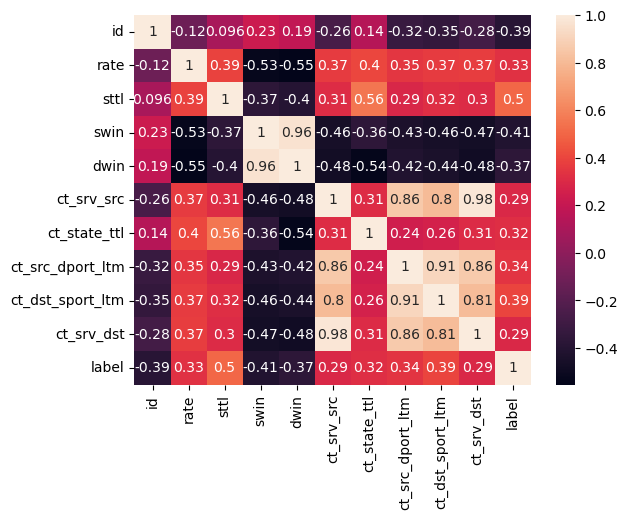

In [16]:
from matplotlib import pyplot as plt

sn.heatmap(train_data_copy.corr(), annot=True)

### Drop column 'id' due to unique values

In [ ]:
train_data = train_data_copy.drop(['id'], axis='columns', inplace=True)
test_data = test_data_copy.drop(['id'], axis='columns', inplace=True)

### (1-6) Plot data after dropping columns

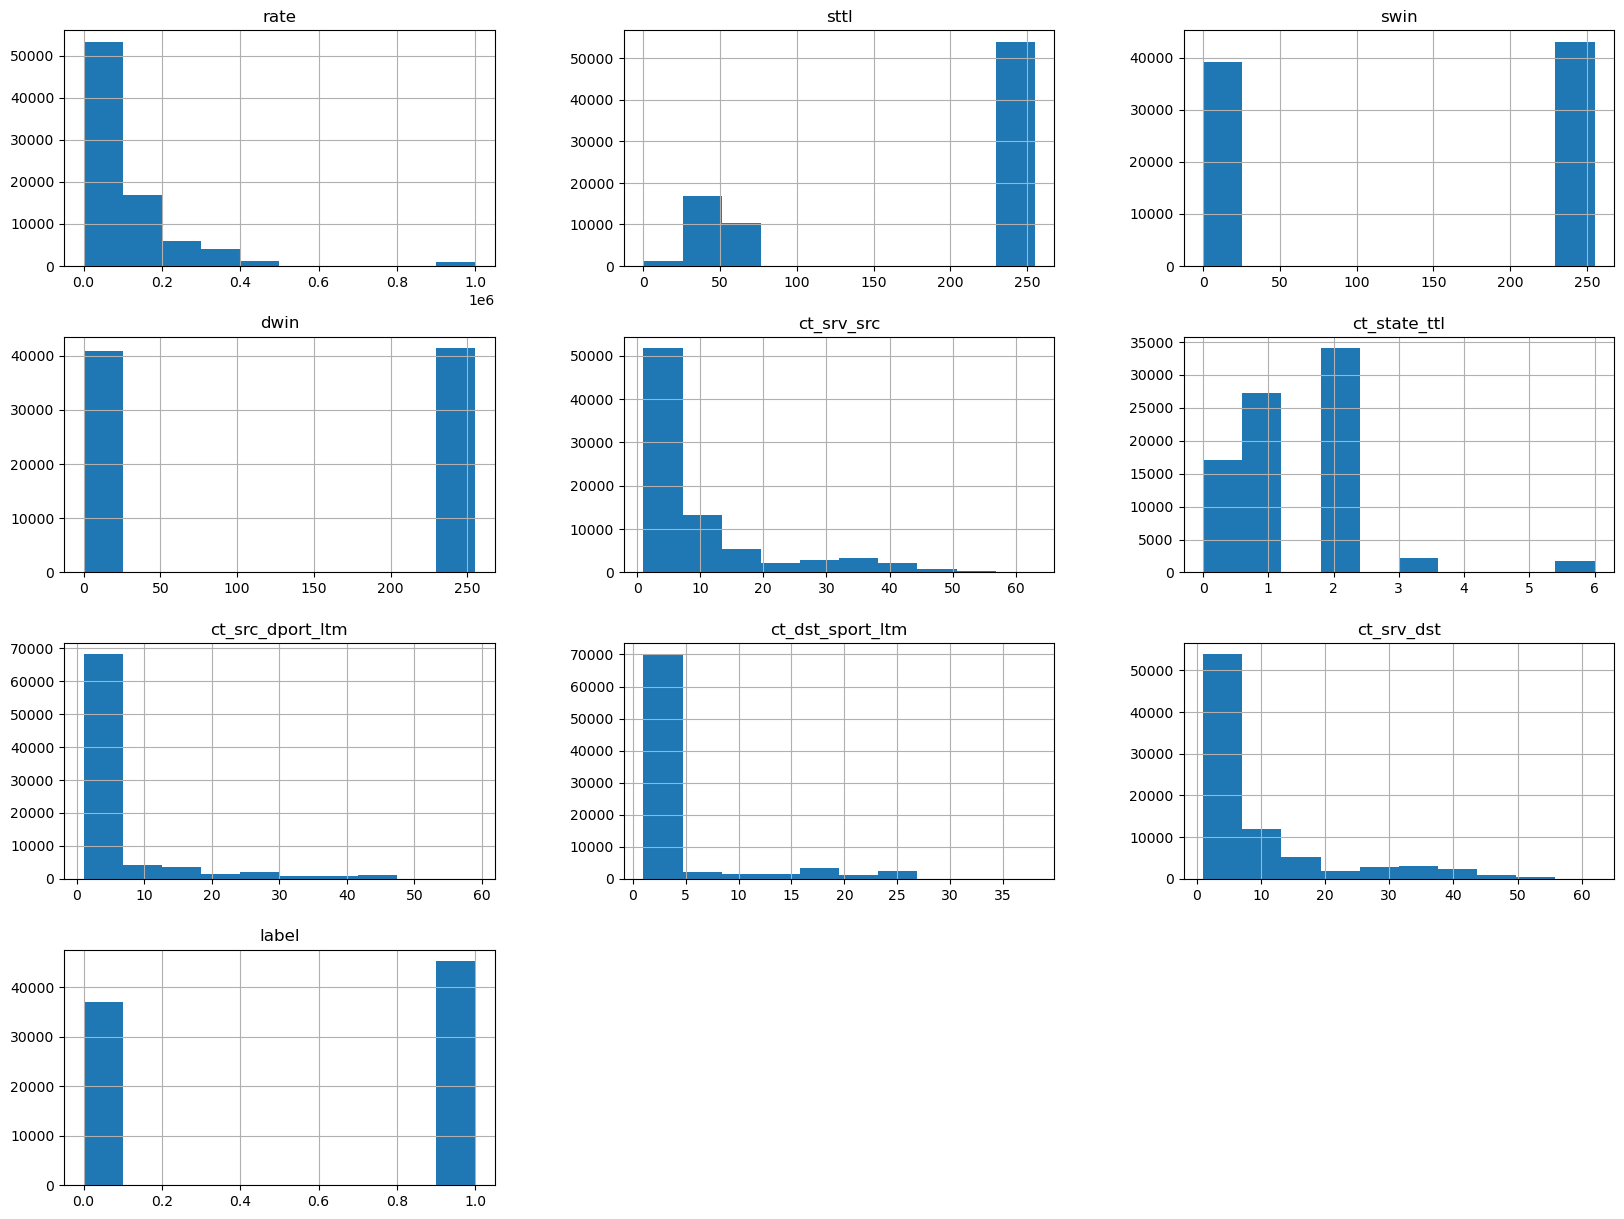

In [19]:
import matplotlib.pyplot as plt

# Visualize the attributes of train dataset
train_data_copy.hist(bins=10, figsize=(20,15))
plt.show()

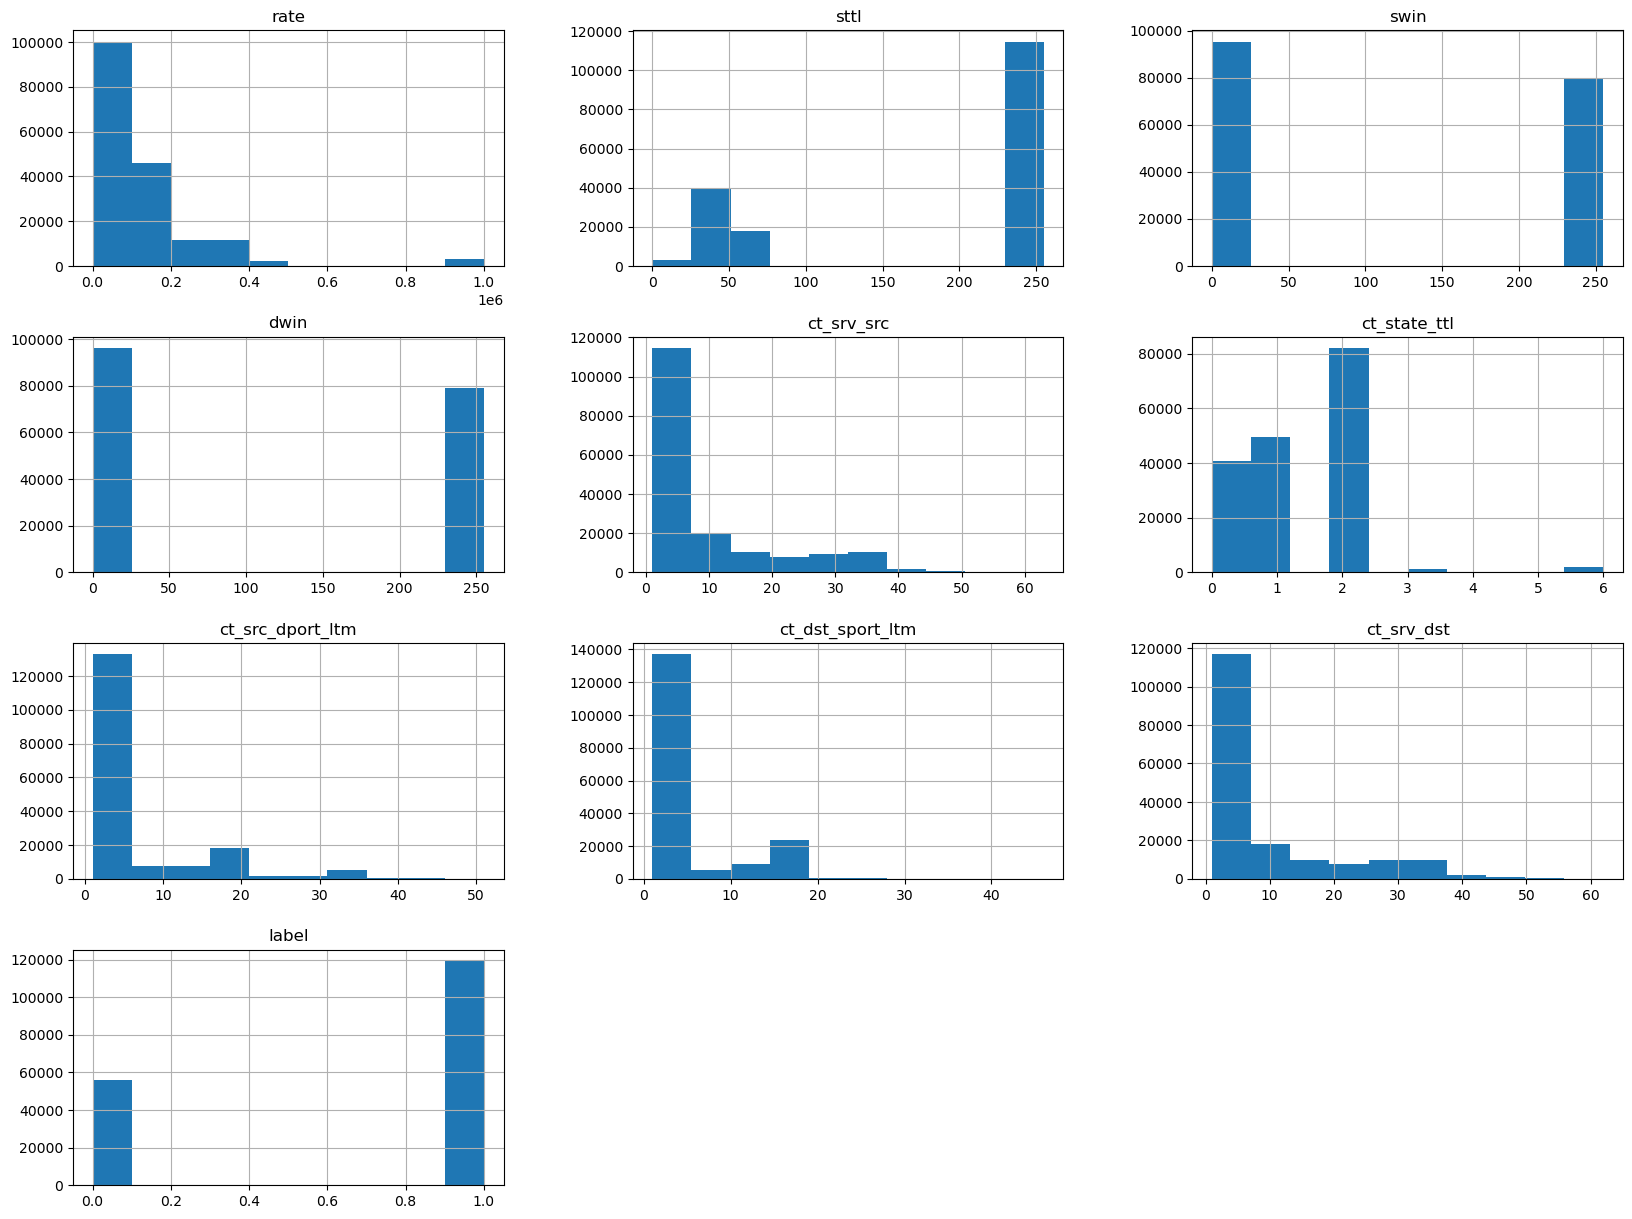

In [20]:
# Visualize the attributes of train dataset
test_data_copy.hist(bins=10, figsize=(20,15))
plt.show()

# (2) Prepare the data for machine learning algorithms

In [21]:
PredictorColumns = ['rate', 'sttl', 'swin', 'dwin', 'ct_srv_src', 'ct_state_ttl', 
                    'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_srv_dst']
TargetColumn_1 = 'label'
TargetColumn_2 = 'attack_cat'

X_train = train_d.loc[:, PredictorColumns]
y_train = train_d.loc[:, TargetColumn_1]

X_test = test_d.loc[:, PredictorColumns]
y_test = test_d.loc[:, TargetColumn_1]

# -----------------------------------------------------------------------------------------------------------

# K-Nearest Neighbor Classifier

# (3) Select and train models and print outcomes (Before fine-tuning)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

KNNclf = KNeighborsClassifier(n_neighbors = 5)
KNN = KNNclf.fit(X_train, y_train)
KNN_prediction = KNN.predict(X_test)

Accuracy: 87.75%
Precision: 96.06%
Recall: 85.51%
F1 Score: 90.48%
AUC: 89.01%

[[ 51813   4187]
 [ 17297 102044]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83     56000
           1       0.96      0.86      0.90    119341

    accuracy                           0.88    175341
   macro avg       0.86      0.89      0.87    175341
weighted avg       0.89      0.88      0.88    175341



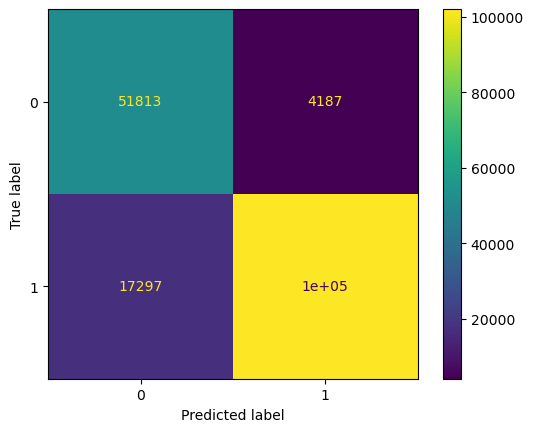

In [23]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, KNN_prediction)
precision = precision_score(y_test, KNN_prediction)
recall = recall_score(y_test, KNN_prediction)
f1 = f1_score(y_test, KNN_prediction)
auc = roc_auc_score(y_test, KNN_prediction)
    

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%" .format(precision *100))
print("Recall: {:.2f}%" .format(recall *100))
print("F1 Score: {:.2f}%" .format(f1*100))
print("AUC: {:.2f}%" .format(auc*100))
print()

# Print the confusion matrix
print(confusion_matrix(y_test, KNN_prediction))
# Print the classification report
print(classification_report(y_test, KNN_prediction))

import matplotlib.pyplot as plt

# Visualize confusion matrix 
cm = confusion_matrix(y_test, KNN_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KNN.classes_)
disp.plot()
plt.show()

# (4) Fine-tuning Model : Change n_neighbors from 5 to 7

In [24]:
KNNclf = KNeighborsClassifier(n_neighbors = 7)
KNN = KNNclf.fit(X_train, y_train)
KNN_prediction = KNN.predict(X_test)

# (5) Evaluate the outcomes (After fine-tuning)

In [25]:
accuracy = accuracy_score(y_test, KNN_prediction)
precision = precision_score(y_test, KNN_prediction)
recall = recall_score(y_test, KNN_prediction)
f1 = f1_score(y_test, KNN_prediction)
auc = roc_auc_score(y_test, KNN_prediction)
    

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%" .format(precision *100))
print("Recall: {:.2f}%" .format(recall *100))
print("F1 Score: {:.2f}%" .format(f1*100))
print("AUC: {:.2f}%" .format(auc*100))
print()

# Print the confusion matrix
print(confusion_matrix(y_test, KNN_prediction))
# Print the classification report
print(classification_report(y_test, KNN_prediction))

Accuracy: 87.94%
Precision: 96.13%
Recall: 85.73%
F1 Score: 90.63%
AUC: 89.19%

[[ 51878   4122]
 [ 17026 102315]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83     56000
           1       0.96      0.86      0.91    119341

    accuracy                           0.88    175341
   macro avg       0.86      0.89      0.87    175341
weighted avg       0.89      0.88      0.88    175341



In [26]:
from sklearn.metrics import accuracy_score

print("Best Parameters for label: k = 7")
print("Test Score for label: ", accuracy_score(y_test, KNN_prediction))

Best Parameters for label: k = 7
Test Score for label:  0.8793893042699654


### Outcome : 0.02 accuracy increased after fine-tuning

# -----------------------------------------------------------------------------------------------------------

# Decision Tree Classifier

#  (3) Select and train models and print outcomes (Before fine-tuning)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support

# Create an instance of the DecisionTreeClassifier class
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

Accuracy: 85.71%
Precision: 87.88%
Recall: 85.71%
F1 Score: 90.63%
AUC: 89.19%

[[51394  4606]
 [20443 98898]]

              precision    recall  f1-score   support

           0       0.75      0.93      0.83     56000
           1       0.96      0.86      0.91    119341

    accuracy                           0.88    175341
   macro avg       0.86      0.89      0.87    175341
weighted avg       0.89      0.88      0.88    175341



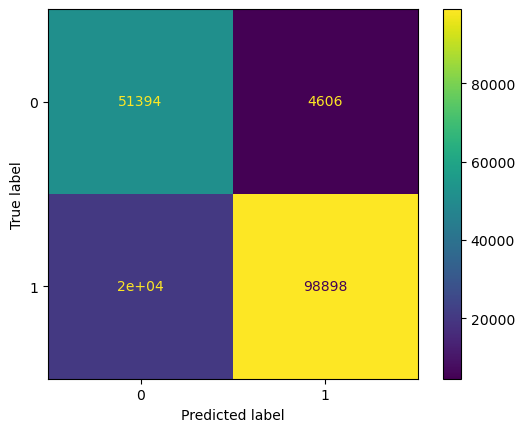

In [28]:
# Measure the accuracy of the model
accuracy = clf.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%" .format(precision *100))
print("Recall: {:.2f}%" .format(recall *100))
print("F1 Score: {:.2f}%" .format(f1*100))
print("AUC: {:.2f}%" .format(auc*100))
print()
print(confusion_matrix(y_test, y_pred))
print()
# Print the classification report
print(classification_report(y_test, KNN_prediction))

# Visualize confusion matrix 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# (4) Fine-tuning Model

In [29]:
from sklearn.model_selection import RandomizedSearchCV


# Create an instance of the DecisionTreeClassifier class
clf = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {'max_depth': np.arange(3, 11),
              'min_samples_split': np.arange(2, 11),
              'min_samples_leaf': np.arange(1, 11),
              'criterion': ['gini', 'entropy']}

# Create an instance of the RandomizedSearchCV class
random_search = RandomizedSearchCV(clf, param_grid, cv=5, n_iter=20, random_state=0)

# Fit the random search to the data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
                   random_state=0)

# (5) Evaluate the outcomes (After fine-tuning)

In [30]:
# Print the best parameters and the best score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best parameters:  {'min_samples_split': 3, 'min_samples_leaf': 5, 'max_depth': 9, 'criterion': 'entropy'}
Best score:  0.8721989684200027


### Outcome : 0.2 accuracy increased after fine-tuning

# -----------------------------------------------------------------------------------------------------------

# Random Forest Classifier

#  (3) Select and train models and print outcomes (Before fine-tuning)

Accuracy: 86.09%
Precision: 95.76%
Recall: 83.25%
F1 Score: 89.07%
AUC: 87.69%

[[51597  4403]
 [19991 99350]]

              precision    recall  f1-score   support

           0       0.72      0.92      0.81     56000
           1       0.96      0.83      0.89    119341

    accuracy                           0.86    175341
   macro avg       0.84      0.88      0.85    175341
weighted avg       0.88      0.86      0.86    175341




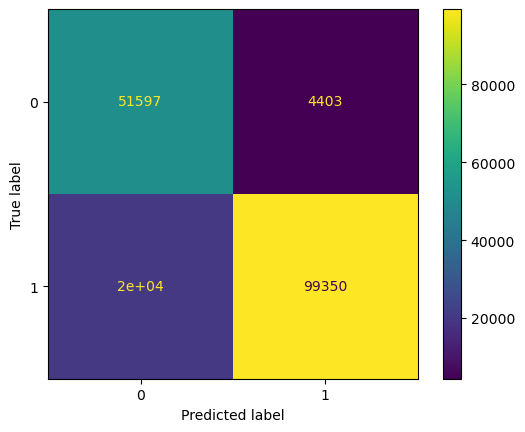

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def random_forest_classifier_accuracy(train_data, test_data):
    # Split the data into features and labels
    X_train = train_data.drop(columns=['label'])
    y_train = train_data['label']
    X_test = test_data.drop(columns=['label'])
    y_test = test_data['label']

    # Initialize the classifier
    clf = RandomForestClassifier(n_estimators=100)

    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    

    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print("Precision: {:.2f}%" .format(precision *100))
    print("Recall: {:.2f}%" .format(recall *100))
    print("F1 Score: {:.2f}%" .format(f1*100))
    print("AUC: {:.2f}%" .format(auc*100))
    print()
    # Print the confusion matrix
    print(confusion_matrix(y_test, y_pred))
    print()
    # Print the classification report
    print(classification_report(y_test, y_pred))
    
    print()
    
    # Visualize confusion matrix 
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.show()
    
random_forest_classifier_accuracy(train_data_copy, test_data_copy)

# (4) Fine-tuning Model using GridSearch CV

In [39]:
from sklearn.model_selection import GridSearchCV

#Function for performing grid search for label column
def perform_grid_search_label(X_train, y_train_label, X_test, y_test_label):
    param_grid = {
        'n_estimators': [10, 50, 100],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 3]
    }
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train_label)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    test_score = grid_search.score(X_test, y_test_label)
    
    print("Best Parameters for label: ", best_params)
    print("Best CV Score for label: ", best_score)
    print("Test Score for label: ", test_score)

# (5) Evaluate the outcomes (After fine-tuning)

In [40]:
# Call the function for label
perform_grid_search_label(X_train, y_train, X_test, y_test)

Best Parameters for label:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 10}
Best CV Score for label:  0.8713850847276449
Test Score for label:  0.8953810004505507


### Outcome : 0.3 accuracy increased after fine-tuning

# -----------------------------------------------------------------------------------------------------------

# Logistic Regression

# (3) Select and train models and print outcomes (Before fine-tuning)

Accuracy: 77.30%
Precision: 80.93%
Recall: 87.19%
F1 Score: 83.95%
AUC: 71.71%

[[ 31487  24513]
 [ 15288 104053]]
              precision    recall  f1-score   support

           0       0.67      0.56      0.61     56000
           1       0.81      0.87      0.84    119341

    accuracy                           0.77    175341
   macro avg       0.74      0.72      0.73    175341
weighted avg       0.77      0.77      0.77    175341



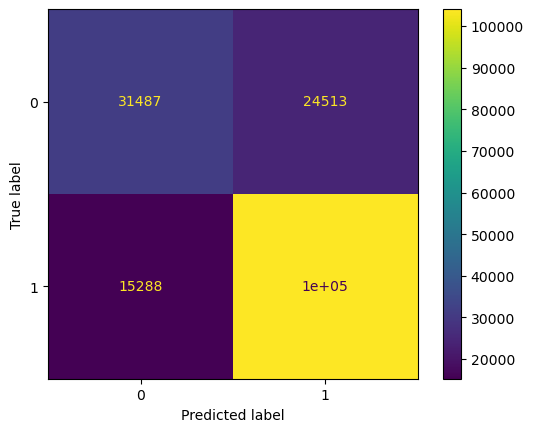

In [36]:
import scipy
from scipy.stats import spearmanr

from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_prediction = LR.predict(X_test)

# Measure the accuracy of the model
accuracy = accuracy_score(y_test, LR_prediction)
precision = precision_score(y_test, LR_prediction)
recall = recall_score(y_test, LR_prediction)
f1 = f1_score(y_test, LR_prediction)
auc = roc_auc_score(y_test, LR_prediction)
    

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%" .format(precision *100))
print("Recall: {:.2f}%" .format(recall *100))
print("F1 Score: {:.2f}%" .format(f1*100))
print("AUC: {:.2f}%" .format(auc*100))
print()

# Print the confusion matrix
print(confusion_matrix(y_test, LR_prediction))
# Print the classification report
print(classification_report(y_test, LR_prediction))

import matplotlib.pyplot as plt

# Visualize confusion matrix 
cm = confusion_matrix(y_test, LR_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot()
plt.show()

# (4) Fine-tuning Model using GridSearch CV

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, decomposition

solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
multi_class_options = ['ovr', 'multinomial']
class_weight_options = ['None', 'balanced']

param_grid = dict(solver = solver_options, 
                  multi_class = multi_class_options, 
                  class_weight = class_weight_options)

grid = GridSearchCV(LR, param_grid, cv=12, scoring = 'accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=12, estimator=LogisticRegression(),
             param_grid={'class_weight': ['None', 'balanced'],
                         'multi_class': ['ovr', 'multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             scoring='accuracy')

In [38]:
best_params = grid.best_params_
best_score = grid.best_score_
test_score = grid.score(X_test, y_test)
    
print("Best Parameters for label: ", best_params)
print("Best CV Score for label: ", best_score)
print("Test Score for label: ", test_score)

Best Parameters for label:  {'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'newton-cg'}
Best CV Score for label:  0.7367487732594861
Test Score for label:  0.8142362596312328


### Outcome : 0.4 accuracy increased after fine-tuning